In [76]:
import pandas as pd
from requests import get


def get_data(url):
    response = get(url, timeout=15)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=wales&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint2 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint3 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=northern ireland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint4 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=scotland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )


    data = get_data(endpoint2)
    wales_data = get_data(endpoint)
    N_ireland = get_data(endpoint3)
    scot = get_data(endpoint4)
    #print(data)
    print(wales_data)


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [67]:
type(data['data'])

list

In [68]:
Eng_df=pd.DataFrame(data['data'])
wales_df=pd.DataFrame(wales_data['data'])
nireland_df=pd.DataFrame(N_ireland['data'])
scot_df = pd.DataFrame(scot['data'])

In [74]:
scot_df.sort_values(by=['date'])


,areaname,areacode,date,newCases
259,Scotland,S92000003,2020-01-03,0
258,Scotland,S92000003,2020-01-04,0
257,Scotland,S92000003,2020-01-05,0
256,Scotland,S92000003,2020-01-06,0
255,Scotland,S92000003,2020-01-07,0
...,...,...,...,...
4,Scotland,S92000003,2020-09-14,70
3,Scotland,S92000003,2020-09-15,267
2,Scotland,S92000003,2020-09-16,267
1,Scotland,S92000003,2020-09-17,290


In [70]:
UK_df = pd.concat([scot_df, wales_df, nireland_df,Eng_df], ignore_index = True, sort=False)

In [71]:
UK_df['areacode'].value_counts()

S92000003    260
E92000001    260
W92000004    260
N92000002    260
Name: areacode, dtype: int64

In [27]:
import matplotlib.pyplot as plt

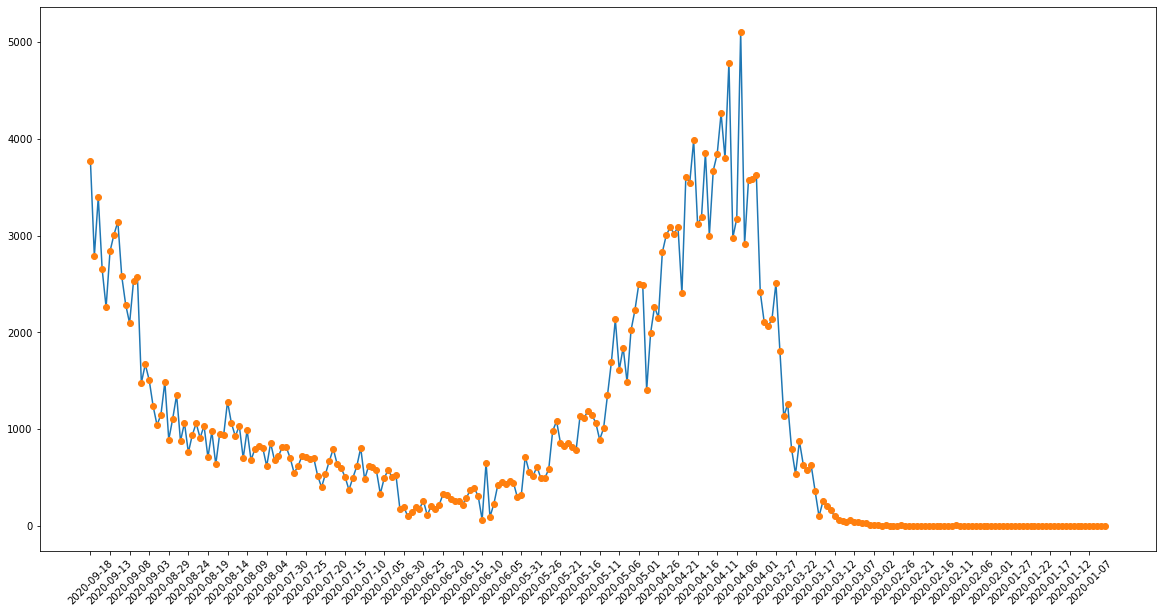

In [65]:
plt.figure(figsize=(20,10))
plt.plot(Eng_df.index.values,'newCases',data=Eng_df)
plt.plot_date(x='date',y='newCases',data=Eng_df, xdate=True)
plt.xticks(ticks = Eng_df['date'].tolist()[0::5],rotation=45)
plt.show()

In [62]:
Eng_df.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [84]:
from uk_covid19 import Cov19API,api_interface,data_format

In [183]:

cases_and_deaths = {
    "date":"date",
    "areaName":"areaName",
    "areaCode":"areaCode",
    "newCases":"newCasesByPublishDate",
    "newTests":"newTestsByPublishDate",
    "Hospitaladmissions":"newAdmissions"
    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    #latest_by="newCasesByPublishDate"
)

data = api.get_json()

print(data)

{'data': [{'date': '2020-09-18', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 4322, 'newTests': 267294, 'Hospitaladmissions': None}, {'date': '2020-09-17', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 3395, 'newTests': 285296, 'Hospitaladmissions': None}, {'date': '2020-09-16', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 3991, 'newTests': 288822, 'Hospitaladmissions': None}, {'date': '2020-09-15', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 3105, 'newTests': 221192, 'Hospitaladmissions': None}, {'date': '2020-09-14', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 2621, 'newTests': 227075, 'Hospitaladmissions': None}, {'date': '2020-09-13', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 3330, 'newTests': 231969, 'Hospitaladmissions': None}, {'date': '2020-09-12', 'areaName': 'United Kingdom', 'areaCode': 'K02000001', 'newCases': 3497, 'newTests': 250839, 'Hos

In [190]:
UK_ltla = pd.DataFrame(data['data'])

In [191]:
UK_ltla

,date,areaName,areaCode,newCases,newTests,Hospitaladmissions
0,2020-09-18,United Kingdom,K02000001,4322,267294.0,NaN
1,2020-09-17,United Kingdom,K02000001,3395,285296.0,NaN
2,2020-09-16,United Kingdom,K02000001,3991,288822.0,NaN
3,2020-09-15,United Kingdom,K02000001,3105,221192.0,NaN
4,2020-09-14,United Kingdom,K02000001,2621,227075.0,NaN
...,...,...,...,...,...,...
255,2020-01-07,United Kingdom,K02000001,0,NaN,NaN
256,2020-01-06,United Kingdom,K02000001,0,NaN,NaN
257,2020-01-05,United Kingdom,K02000001,0,NaN,NaN
258,2020-01-04,United Kingdom,K02000001,0,NaN,NaN


In [192]:
import numpy as np
UK_ltla.loc[UK_ltla['Hospitaladmissions']==np.nan]

,date,areaName,areaCode,newCases,newTests,Hospitaladmissions


In [160]:
UK_ltla

,date,areaName,areaCode,newCases,newTests
0,2020-09-18,Crawley,E07000226,0,None
1,2020-09-17,Crawley,E07000226,0,None
2,2020-09-16,Crawley,E07000226,0,None
3,2020-09-15,Crawley,E07000226,0,None
4,2020-09-14,Crawley,E07000226,0,None
...,...,...,...,...,...
255,2020-01-07,Crawley,E07000226,0,None
256,2020-01-06,Crawley,E07000226,0,None
257,2020-01-05,Crawley,E07000226,0,None
258,2020-01-04,Crawley,E07000226,0,None
